In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython

In [2]:
%%R
library(mlbench)
datasetnormals <- mlbench.2dnormals(200)
XR_datasetnormals <- datasetnormals$x
LABELSR_datasetnormals <- datasetnormals$classes
LABELSR_datasetnormals
datasetxor <- mlbench.xor(100)
XR_datasetxor <- datasetxor$x
LABELSR_datasetxor<- datasetxor$classes

datasetcircle <- mlbench.circle(100)
XR_datasetcircle <- datasetcircle$x
LABELSR_datasetcircle <- datasetcircle$classes

datasetspirals <- mlbench.spirals(100, sd = 0.05)
XR_datasetspirals <- datasetspirals$x
LABELSR_datasetspirals <- datasetspirals$classes

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [3]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()
x_df_normals = np.array(ro.r['XR_datasetnormals'])
labels_df_normals = np.array(ro.r['LABELSR_datasetnormals'])

x_df_xor = np.array(ro.r['XR_datasetxor'])
labels_df_xor = np.array(ro.r['LABELSR_datasetxor'])

x_df_circle = np.array(ro.r['XR_datasetcircle'])
labels_df_circle = np.array(ro.r['LABELSR_datasetcircle'])

x_df_espirals = np.array(ro.r['XR_datasetspirals'])
labels_df_espirals = np.array(ro.r['LABELSR_datasetspirals'])

In [4]:
from sklearn.model_selection import train_test_split
X_trainnormals, X_testnormals, y_trainnormals, y_testnormals = train_test_split(x_df_normals, labels_df_normals, random_state = 0, train_size = 0.7)
X_trainxor, X_testxor, y_trainxor, y_testxor = train_test_split(x_df_xor, labels_df_xor, random_state = 0, train_size = 0.7)
X_traincircle, X_testcircle, y_traincircle, y_testcircle = train_test_split(x_df_circle, labels_df_circle, random_state = 0, train_size = 0.7)
X_trainespirals, X_testespirals, y_trainnespirals, y_testespirals = train_test_split(x_df_espirals, labels_df_espirals, random_state = 0, train_size = 0.7)


#### Plotando o gráfico, e treinando a rede para o conjunto de dados1 : 

In [5]:
import train_test_ELM
pnormals = 100
X_trainnormals = np.array(X_trainnormals)
X_testnormals = np.array(X_testnormals)
y_trainnormals = np.array(y_trainnormals)
y_testnormals = np.array(y_testnormals)
train_ELMnormals = train_test_ELM.train_ELM(X_trainnormals, y_trainnormals, pnormals, control = True)
wnormals = np.array(train_ELMnormals[0])
Hnormals = np.array(train_ELMnormals[1])
Znormals = np.array(train_ELMnormals[2])

In [6]:
y_hatrainnormals = train_test_ELM.test_ELM(X_trainnormals, Znormals, wnormals, True)
y_hatestnormals = train_test_ELM.test_ELM(X_testnormals, Znormals, wnormals, True)

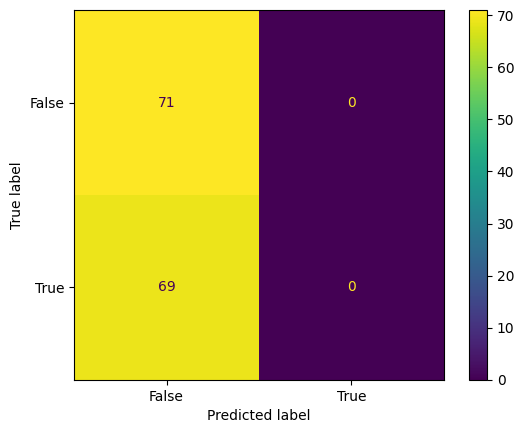

There are a total of 69 errors in the train.


In [7]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_trainnormals, y_hatrainnormals)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
sum_train = sum(y_trainnormals != y_hatrainnormals)
print(f"There are a total of {sum_train} errors in the train.")

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

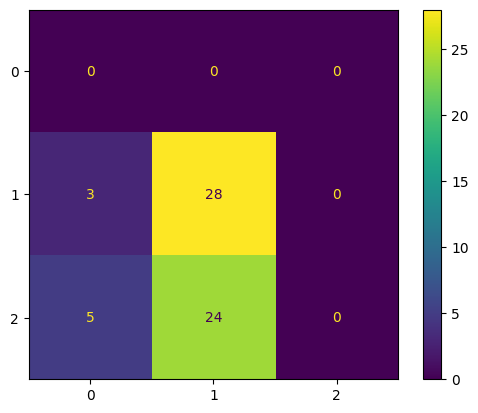

In [8]:
confusion_matrix = metrics.confusion_matrix(y_testnormals, y_hatestnormals)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
sum_test = sum(y_testnormals != y_hatestnormals)
print(f"There are a total of {sum_test} errors in the test.")

##### Organizando os dados em labels e gerando o gráfico dos dados : 

In [ ]:
train_ELMxor = train_test_ELM.train_ELM(X_trainnormals, y_trainnormals, pnormals, control = True)
wnormals = np.array(train_ELMnormals[0])
Hnormals = np.array(train_ELMnormals[1])
Znormals = np.array(train_ELMnormals[2])

#### Plotando o gráfico, e treinando a rede para o conjunto de dados1 : 

In [ ]:
pxor = 100
X_trainxor = np.array(X_trainxor)
X_testxor = np.array(X_testxor)
y_trainxor = np.array(y_trainxor)
y_testxor = np.array(y_testxor)
train_ELMxor = train_test_ELM.train_ELM(X_trainxor, y_trainxor, pxor, control = True)
wxor = np.array(train_ELMxor[0])
Hxor = np.array(train_ELMxor[1])
Zxor = np.array(train_ELMxor[2])

In [9]:
seqx1x2 = np.linspace(start = -2, stop = 10, num = 300)
np_grid = seqx1x2.shape[0]
shape = (np_grid, np_grid)
MZ = np.zeros(shape)
for i in range(np_grid):
    for j in range(np_grid):
        x1 = seqx1x2[i]
        x2 = seqx1x2[j]
        x1x2 = np.column_stack((x1, x2, 1))
        h1 = np.tanh(np.dot(x1x2, Z))
        h1 = np.column_stack((h1, np.ones_like(h1[:, 0])))
        MZ[i, j] = np.sign(np.dot(h1, w))


plt.contour(seqx1x2, seqx1x2, MZ, levels = 1)
plt.scatter(x1[:, 0], g1[:, 1], color = 'red', label = 'data1')
plt.scatter(g2[:, 0], g2[:, 1], color = 'blue', label = 'data2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.show()

NameError: name 'Z' is not defined